![title](https://avatars0.githubusercontent.com/u/365630?v=4&s=400)

En este notebook, para cerrar el día 3, vamos a ver los mismos problemas que resolvimos en el taller, pero utilizando la librería sklearn. Esta libreria es la más utilizada para Machine Learning en Python, debido a su versatilidad, simplicidad, compatibilidad con las demás librerias de datos y por su rendimiento. Las operaciones en sklearn están estandarizadas para que las interfaces de todos los modelos sean iguales. Para entrenar y predecir con un modelo, se hacen los siguientes pasos: 

1. Instanciamos la clase del modelo, con los parametros de la misma. 
2. Llamamos el metodo **fit** del modelo con los datos de entrenamiento. Este metodo es aquel que ejecuta los pasos del modelo de aprendizaje y optimiza los parametros del modelo.
3. Llamamos el metodo **score** del modelo, con los datos de prueba. Este metodo evalua el modelo según su metodo de rendimiento escogido (como $R^2$,MSE, Accuracy,etc.), o  para ciertos modelos, con un rendimiento parametrizable.
4. Si es necesario, llamamos al metodo **predict**, con los datos a los cuales le faltan su variable de predicción y.

Vamos a verlo en acción.

## Regresión Lineal 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams 
# Parametros de las graficas.
rcParams['figure.figsize'] = (4, 4)
rcParams['figure.dpi'] = 150
rcParams['font.size'] = 10

In [2]:
pops = pd.read_csv('empresas.csv')
pops.head()
X = pops.drop("Ganancias",axis = 1)
y = pops['Ganancias']

Scikit-learn tiene muchos modulos, los cuales tienen propositos especificos. Por ejemplo, para los modelos de regresión lineal y logistica, llamamos el modulo **linear_model** y de ahi importamos el modelo especifico. Tambien, nos facilita la división de entrenamiento y prueba con **train_test_split**.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


empresas_LM = LinearRegression()
empresas_LM

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Podemos ver los parametros del modelo imprimiento el objeto, o llamando get_params.

In [4]:
empresas_LM.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [5]:
# Entrenamiento y validacion.
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size = 0.2,random_state = 42)
empresas_LM.fit(Xtrain,ytrain)
print("R^2 del modelo con los datos de prueba: {}".format(empresas_LM.score(Xtest,ytest)))
print("R^2 del modelo con los datos de entrenamiento: {}".format(empresas_LM.score(Xtrain,ytrain)))

R^2 del modelo con los datos de prueba: 0.5003441133385782
R^2 del modelo con los datos de entrenamiento: 0.7513605550608946


En este caso, esta regresión lineal es la que ustedes ven en Excel o **Ordinary Least Squares Regression**. Si queremos la versión con el descenso del gradiente, utilizamos **SGD Regressor**. Esta versión tiene más funcionalidades que la que hicimos en el taller, asi que resulta ser más poderosa.

In [6]:
from sklearn.linear_model import SGDRegressor

empresas_SGD = SGDRegressor()
empresas_SGD.get_params()

{'alpha': 0.0001,
 'average': False,
 'epsilon': 0.1,
 'eta0': 0.01,
 'fit_intercept': True,
 'l1_ratio': 0.15,
 'learning_rate': 'invscaling',
 'loss': 'squared_loss',
 'n_iter': 5,
 'penalty': 'l2',
 'power_t': 0.25,
 'random_state': None,
 'shuffle': True,
 'verbose': 0,
 'warm_start': False}

In [7]:
empresas_SGD.fit(Xtrain,ytrain)
print("R^2 del modelo con los datos de prueba: {}".format(empresas_SGD.score(Xtest,ytest)))
print("R^2 del modelo con los datos de entrenamiento: {}".format(empresas_SGD.score(Xtrain,ytrain)))

R^2 del modelo con los datos de prueba: 0.5347698559834987
R^2 del modelo con los datos de entrenamiento: 0.6235341754843935


Para ambos modelos, podemos ver sus pesos (coeficientes) e intercepto.

In [8]:
print("Pesos: {}".format(empresas_SGD.coef_))
print("Intercepto: {}".format(empresas_SGD.intercept_))

Pesos: [ 0.77162079]
Intercepto: [-0.9953043]


Y para ver la linea de regresión, podemos hacer igual que en el taller (no hay una función que la despliegue por su cuenta).


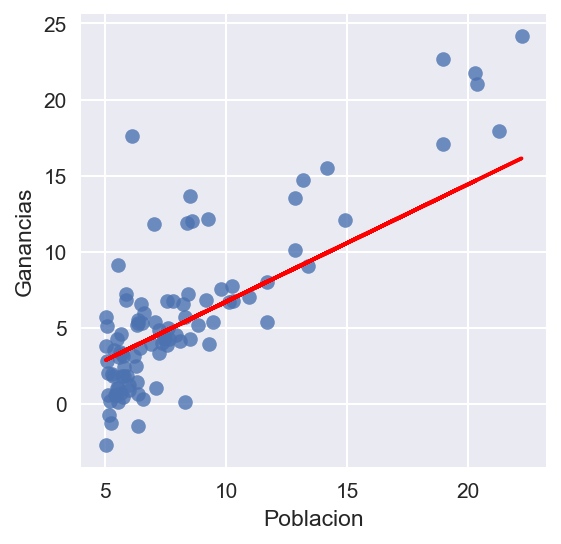

In [9]:
linea = empresas_SGD.predict(Xtrain)
plt.plot(Xtrain,linea,c = 'red')
sns.regplot(x = 'Poblacion', y = 'Ganancias', data = pops,fit_reg = False)

Y podemos comparar las predicciones en los datos de prueba contra los datos reales.

In [10]:
test_pred = empresas_SGD.predict(Xtest)
pd.DataFrame({'Real':ytest,
             'Prediccion':test_pred})

,Prediccion,Real
62,15.424014,17.92900
40,3.176772,0.55657
93,3.098453,1.98690
18,3.965909,3.65180
81,3.008173,0.20421
83,6.542428,7.54350
64,13.633854,17.05400
42,8.038832,5.38540
10,3.411191,3.25220
0,3.719376,17.59200


## Regresión Lineal 2

Scikit-learn tambien incluye metodos para poder normalizar los datos.

In [11]:
from sklearn.preprocessing import StandardScaler
casas = pd.read_csv("casas.csv")
scaler = StandardScaler()
casas_norm = scaler.fit_transform(casas)
casas_norm[0]

array([ 0.13141542, -0.22609337,  0.48089023])

In [12]:
Xtrain,Xtest,ytrain,ytest = train_test_split(casas_norm[:,0:2],casas_norm[:,2],test_size = 0.2,random_state = 42)
casas_SGD = SGDRegressor(n_iter = 100)
casas_SGD.fit(Xtrain,ytrain)
print("R^2 del modelo con los datos de prueba: {}".format(casas_SGD.score(Xtest,ytest)))
print("R^2 del modelo con los datos de entrenamiento: {}".format(casas_SGD.score(Xtrain,ytrain)))

R^2 del modelo con los datos de prueba: 0.5195334464464014
R^2 del modelo con los datos de entrenamiento: 0.7673857512706973


Si queremos evaluar por MSE, sklearn tambien está atento.

In [13]:
from sklearn.metrics import mean_squared_error
prediccion_test = casas_SGD.predict(Xtest)
print("MSE de prueba del modelo: {}".format(mean_squared_error(ytest,prediccion_test)))
prediccion_train = casas_SGD.predict(Xtrain)
print("MSE de entrenamiento del modelo: {}".format(mean_squared_error(ytrain,prediccion_train)))

MSE de prueba del modelo: 0.5572957230046823
MSE de entrenamiento del modelo: 0.2013200903823839


Algo que me dice que el modelo esta **overfitting**. Quizas porque tenemos pocos ejemplos de entrenamiento. Si queremos convertir los datos a su escala original, podemos usar el scaler que creamos anteriormente.

In [14]:
normal = pd.DataFrame({'Area':casas_norm[:,0],
                      'Habitaciones':casas_norm[:,1],
                      'Precio':casas_norm[:,2]})
normal.head()

,Area,Habitaciones,Precio
0,0.131415,-0.226093,0.480890
1,-0.509641,-0.226093,-0.084983
2,0.507909,-0.226093,0.231097
3,-0.743677,-1.554392,-0.876398
4,1.271071,1.102205,1.612637


In [15]:
desnormalizado = pd.DataFrame(scaler.inverse_transform(normal))
desnormalizado.columns = casas.columns
desnormalizado.head()

,Area,Habitaciones,Precio
0,2104.0,3.0,399900.0
1,1600.0,3.0,329900.0
2,2400.0,3.0,369000.0
3,1416.0,2.0,232000.0
4,3000.0,4.0,539900.0


## Regresión Logistica 1

Al igual que en regresión lineal, el modulo **LogisticRegression** no es con el gradiente como en el taller. Para la versión del gradiente utilizanmos **SGDClassifier**. 

In [16]:
notas = pd.read_csv("examenes.csv")
notas_scaler = StandardScaler()
notas_norm = pd.DataFrame(notas_scaler.fit_transform(notas.drop('Admitido',axis = 1)),
                          columns = notas.drop('Admitido',axis =1).columns)
notas_norm['Admitido'] = notas.Admitido
notas_norm.head()

,Ingles,Matematicas,Admitido
0,-1.602248,0.638341,0
1,-1.826256,-1.207541,0
2,-1.539040,0.361294,0
3,-0.282101,1.086368,1
4,0.691528,0.493378,1


In [17]:
from sklearn.linear_model import SGDClassifier
Xtrain,Xtest,ytrain,ytest = train_test_split(notas_norm.drop('Admitido',axis = 1)
                                             ,notas_norm['Admitido'],test_size = 0.2,random_state = 42)


notas_clf = SGDClassifier(loss = 'log',n_iter = 100)
notas_clf.fit(Xtrain,ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=100, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

En este caso, **score** retorna la certeza (accuracy) del modelo.

In [18]:
print("Accuracy del modelo con los datos de prueba: {}".format(notas_clf.score(Xtest,ytest)))
print("Accuracy del modelo con los datos de entrenamiento: {}".format(notas_clf.score(Xtrain,ytrain)))

Accuracy del modelo con los datos de prueba: 0.85
Accuracy del modelo con los datos de entrenamiento: 0.9


Este modelo tiene dos funciones de predicción: una para las probabilidades y otra para la clase final en si.

In [19]:
proba_test = np.round(notas_clf.predict_proba(Xtest),5)
class_test = notas_clf.predict(Xtest)

pd.DataFrame({'Probabilidad_0':proba_test[:,0],
              'Probabilidad_1':proba_test[:,1],
             'Prediccion':class_test,
             'Real':ytest})

,Prediccion,Probabilidad_0,Probabilidad_1,Real
83,0,0.92575,0.07425,1
53,0,0.99997,0.00003,0
70,0,1.00000,0.00000,0
45,0,0.95928,0.04072,0
44,0,0.99989,0.00011,0
39,0,0.99639,0.00361,0
22,0,0.99976,0.00024,0
80,1,0.00001,0.99999,1
10,1,0.01348,0.98652,0
0,0,0.98972,0.01028,0


Para la frontera de decisión, nuevamente, tenemos que graficarla nosotros mismos.

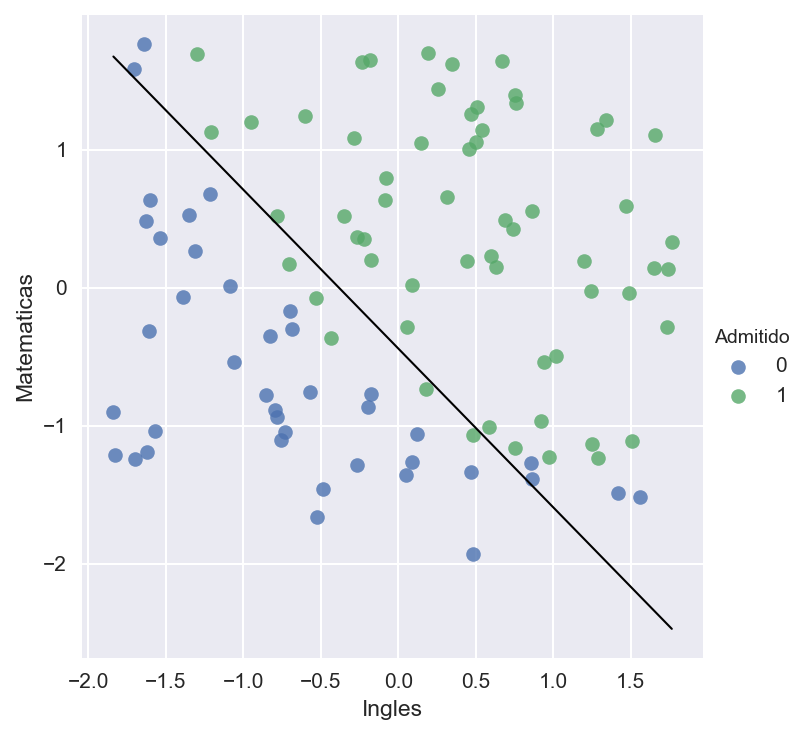

In [20]:
#Magia negra para graficar la linea de separación
a = -notas_clf.coef_[0][0] / notas_clf.coef_[0][1]
xx = np.linspace(notas_norm.Ingles.min(), notas_norm.Ingles.max())
yy = a * xx - (notas_clf.intercept_) / notas_clf.coef_[0][1]


sns.lmplot(x = 'Ingles',y = 'Matematicas',hue = 'Admitido', data = notas_norm,fit_reg = False)
plt.plot(xx, yy, 'k-',linewidth = 1)

## Regresión Logistica 2

Para este caso, podemos aplicar la transformación polinomial, al igual que en el taller.

In [21]:
micro = pd.read_csv("micro.csv")
from sklearn.preprocessing import PolynomialFeatures
#Crear matriz con las variables polinomiales.
poly = PolynomialFeatures(6) 
polyX = poly.fit_transform(micro.drop('Aceptado',axis = 1))
polyX.shape

(118, 28)

In [22]:
Xtrain,Xtest,ytrain,ytest = train_test_split(polyX
                                             ,micro['Aceptado'],test_size = 0.2,random_state = 42)

qa_clf = SGDClassifier(loss = 'log',n_iter = 1000,penalty = None)
qa_clf.fit(Xtrain,ytrain)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', n_iter=1000, n_jobs=1,
       penalty=None, power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [23]:
print("Accuracy del modelo con los datos de prueba: {}".format(qa_clf.score(Xtest,ytest)))
print("Accuracy del modelo con los datos de entrenamiento: {}".format(qa_clf.score(Xtrain,ytrain)))

Accuracy del modelo con los datos de prueba: 0.875
Accuracy del modelo con los datos de entrenamiento: 0.851063829787234


Y la linea de decision:

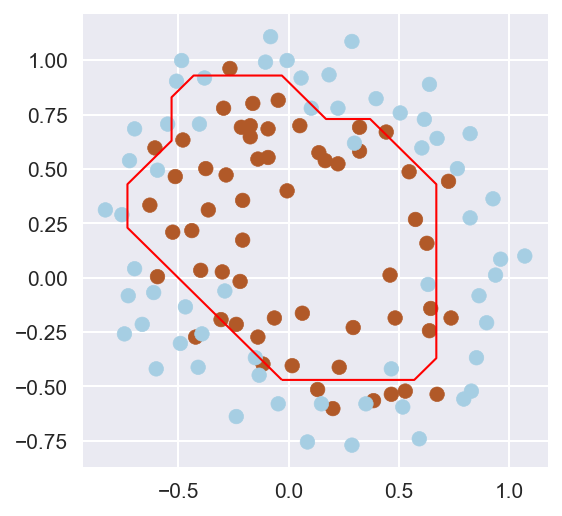

In [24]:
def Plot_Decision(X,y,clf):
    #Funcion para visualizar la curva de decision. No le presten mucha atención.
    x_min, x_max = X[:, 0].min() , X[:, 0].max() 
    y_min, y_max = X[:, 1].min() , X[:, 1].max() 
    xx, yy = np.meshgrid(np.arange(x_min, x_max,0.2),
                         np.arange(y_min, y_max,0.2))


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(poly.fit_transform(np.c_[xx.ravel(), yy.ravel()]))

    # Put the result into a color plot
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,[0.5], linewidths=1,colors = 'r')

Plot_Decision(micro.drop('Aceptado',axis = 1).values,micro['Aceptado'],qa_clf)

Si queremos ver la **matriz de confusión**, que nos muestra:

- Verdaderos Positivos: Positivos clasificados como positivos $(1 = 1)$
- Falsos Positivos: Negativos clasificados como positivos $(0 \neq 1)$
- Falsos Negativos: Positivos clasificados como negativos $(1 \neq 0)$
- Verdaderos Negativos: Negativos clasificados como negativos $( 0 = 0)$

sklearn tambien nos ayuda:

In [25]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(ytest,qa_clf.predict(Xtest))
print("Verdaderos positivos:{}".format(confusion[1][1]))
print("Falsos positivos:{}".format(confusion[0][1]))
print("Falsos negativos:{}".format(confusion[1][0]))
print("Verdaderos negativos:{}".format(confusion[0][0]))

Verdaderos positivos:11
Falsos positivos:2
Falsos negativos:1
Verdaderos negativos:10


## Validación

De la validación ya hemos visto como separar los datos hasta aquí. Para esta parte, veamos la curva de aprendizaje, pero en vez de utilizar el número de iteraciones, utilicemos la cantidad de datos.

In [26]:
ventas_casa = pd.read_csv('ventas_casa.csv',encoding = 'latin1')
ventas_casa.head()

,habitaciones,baños,area_estancia,area_lote,pisos,frenteagua,vista,condicion,grade,area_techo,año,renovada,sotano,precio
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,1955,0,0,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,1951,1,1,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,1933,0,0,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,1965,0,1,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,1987,0,0,510000.0


In [28]:
log_p = np.log(ventas_casa.precio.sort_values())
ventas_casa.precio = log_p

In [30]:
ventas_scaler = StandardScaler()
ventas_norm = pd.DataFrame(ventas_scaler.fit_transform(ventas_casa),
                          columns = ventas_casa.columns)
ventas_norm.head()

,habitaciones,baños,area_estancia,area_lote,pisos,frenteagua,vista,condicion,grade,area_techo,año,renovada,sotano,precio
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.087173,-0.305759,-0.629187,-0.558836,-0.734708,-0.544898,-0.210135,-0.804102,-1.400937
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.087173,-0.305759,-0.629187,-0.558836,0.460841,-0.681079,4.758845,1.243624,0.280624
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.087173,-0.305759,-0.629187,-1.409587,-1.229834,-1.293892,-0.210135,-0.804102,-1.798281
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,-0.087173,-0.305759,2.444294,-0.558836,-0.891699,-0.204446,-0.210135,1.243624,0.500335
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.087173,-0.305759,-0.629187,0.291916,-0.130895,0.544548,-0.210135,-0.804102,0.179142


In [58]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    
    """
    Función para graficar la curva de aprendizaje. No se preocupen mucho por los detalles, la saque de la documentación de
    sklearn.
    """
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\juan9\\Anaconda3Fix\\lib\\site-packages\\matplotlib\\pyplot.py'>

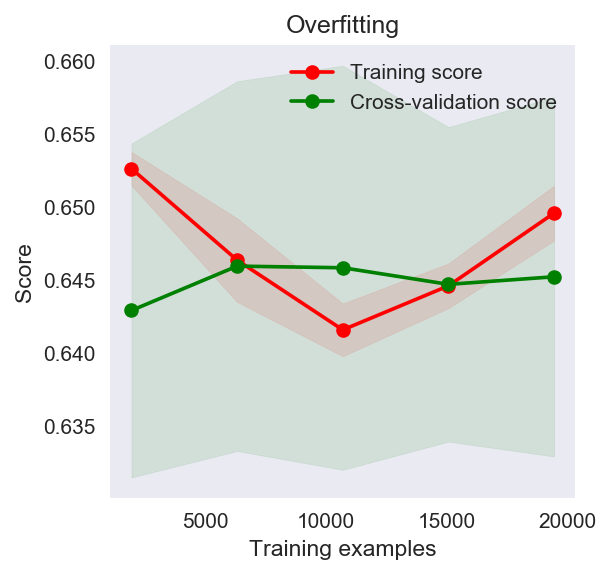

In [67]:
over_model = SGDRegressor(penalty=None)
over_model.fit(ventas_norm.drop('precio',axis = 1),ventas_norm.precio)
plot_learning_curve(over_model, "Overfitting", ventas_norm.drop('precio',axis = 1), ventas_norm.precio,cv = 10)

Este modelo esta haciendo overfitting, pero con un patron extraño. El rendimiento de prueba esta aumentando lentamente mientras se aumenta la cantidad de datos, pero el rendimiento de entrenamiento disminuye luego mejora.

### Underfit

<module 'matplotlib.pyplot' from 'C:\\Users\\juan9\\Anaconda3Fix\\lib\\site-packages\\matplotlib\\pyplot.py'>

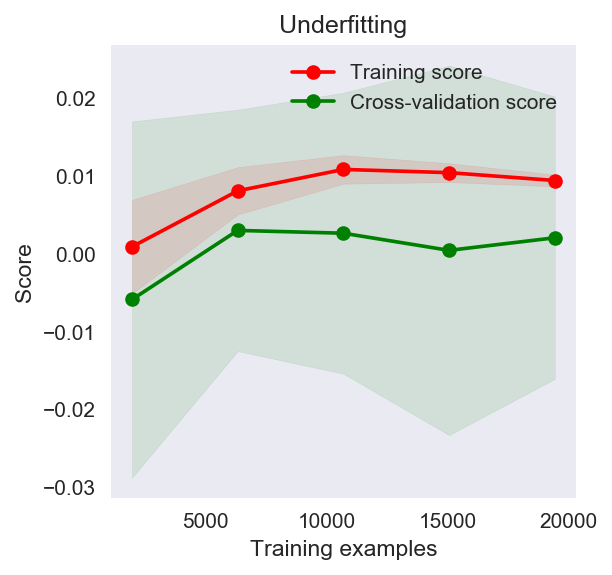

In [69]:
under_model = SGDRegressor(penalty=None)
under_x = ventas_norm['area_lote'].values.reshape(-1,1) #Convertir el vector en una matriz de una sola columna.
under_model.fit(under_x,ventas_norm.precio)
plot_learning_curve(under_model, "Underfitting", under_x, ventas_norm.precio,cv = 10)

Aquí podemos observar como el modelo tiene un mal rendimiento, aun mientras aumentan los datos de prueba. El modelo está underfit porque no le dimos suficientes variables para poder explicar la variación del precio.

### Justo

<module 'matplotlib.pyplot' from 'C:\\Users\\juan9\\Anaconda3Fix\\lib\\site-packages\\matplotlib\\pyplot.py'>

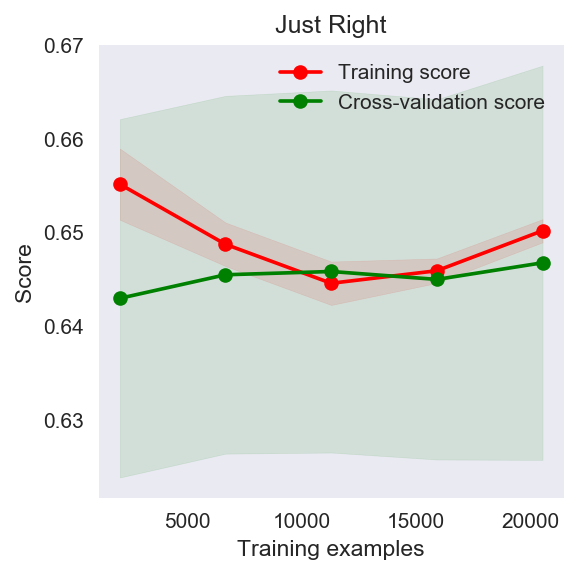

In [79]:
right_model = SGDRegressor(n_iter = 100,penalty='l1')
right_model.fit(ventas_norm.drop('precio',axis = 1),ventas_norm.precio)
plot_learning_curve(right_model, "Just Right", ventas_norm.drop('precio',axis = 1), ventas_norm.precio,cv = 20)

Podemos ver que para este modelo el rendimiento de entrenamiento y prueba anduvieron cerca, y seguiran mejorando mientras aumentan los datos. Este modelo está decente.

## Documentación Scikit-Learn

http://scikit-learn.org/stable/index.html